# <center> Práctica final 2: Pandas </center>

## <font color='purple'>**Ejercicio 1**</font>

En el archivo **estadisticasPaises.xlsx** usted encontrará dos hojas. La hoja **HDI** contiene los datos, mientras que la hoja **Variables** contiene el significado de cada columna. Con los datos, realice lo que se le solicita.

### Pretratamiento

* Consulte la documentación de Pandas ([aquí](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)) por una función que le permita leer un archivo de Excel y guardar los datos en un DataFrame. Utilice un parámetro de esta función para leer solamente la hoja HDI.
* Elimine una de las entradas repetidas de Armenia.
* Rellene los datos faltantes de las columnas que contienen datos de población y de vacunación de niños con 0.

### Análisis

De acuerdo a la información que tiene, determine o aproxime lo siguiente usando operaciones y funciones de Pandas:

* El país que en promedio creció menos en población entre 2010 y 2015.
* La población mundial en 2015.
* El país con mayor porcentaje de adultos mayores en 2015.
* El país que presenta la mayor diferencia entre los años de estudio de una mujer y los de un hombre.
* Los 5 países con menor cantidad de niños de un año vacunados contra difteria del mundo.
* Un histograma del índice de desarrollo humano. 
* Un diagrama de caja y bigote de la dedicación a servicios y a la agricultura. Investigue [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) cómo construirlo. 

##Pretratamiento

In [5]:
#Consulte la documentación de Pandas por una función que le permita leer un archivo de Excel y guardar los datos en un DataFrame. 
#Utilice un parámetro de esta función para leer solamente la hoja HDI.

import numpy as np
import pandas as pd #pd es una convención

pd.options.mode.chained_assignment = None

datosPaises = pd.read_excel('estadisticasPaises.xlsx', sheet_name="HDI") # Returns a DataFrame.  the sheet_name indicating which sheet to parse.
datosPaises

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,P15-64,PA65,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI
0,Norway,0.949,81.7,12.7,0.944,0.951,12.8,12.7,39.6,5.200000,...,3.400000,0.9,1.0,6.0,8.3,64.9,2.1,77.0,4.1,5.4
1,Australia,0.939,82.5,13.2,0.927,0.948,13.4,13.0,30.5,24.000000,...,15.900000,3.6,8.0,7.0,6.3,64.7,2.6,69.5,6.3,8.0
2,Switzerland,0.939,83.1,13.4,0.926,0.951,13.3,13.5,28.9,8.300000,...,5.600000,1.5,2.0,7.0,7.7,68.7,3.2,73.9,4.3,8.4
3,Germany,0.926,81.1,13.2,0.908,0.942,12.9,13.6,36.9,80.699997,...,53.200001,17.1,2.0,3.0,8.7,60.3,1.3,70.4,4.6,7.0
4,Denmark,0.925,80.4,12.7,0.910,0.938,12.6,12.9,37.4,5.700000,...,3.600000,1.1,4.0,10.0,9.2,62.0,2.3,78.0,6.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,0.000000,...,NaN,NaN,1.0,1.0,3.8,NaN,NaN,NaN,NaN,NaN
192,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,0.000000,...,NaN,NaN,1.0,2.0,2.9,NaN,NaN,NaN,NaN,NaN
193,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,0.000000,...,NaN,NaN,18.0,43.0,5.7,NaN,0.3,65.4,NaN,NaN
194,Somalia,NaN,55.7,NaN,NaN,NaN,NaN,NaN,13.8,10.800000,...,5.400000,0.3,48.0,54.0,NaN,54.3,NaN,NaN,7.5,NaN


In [12]:
#Elimine una de las entradas repetidas de Armenia.
print(datosPaises[datosPaises['Name'] == 'Armenia'])

# Using DataFrame.drop_duplicates() to keep first duplicate row
datosPaises = datosPaises.drop_duplicates(keep='first')
print('\n \n', datosPaises[datosPaises['Name'] == 'Armenia'])

       Name    HDI    LE   MYS   HDIF   HDIM  MYSF  MYSM    WP  TP2015  ...  \
83  Armenia  0.743  74.9  11.3  0.736  0.741  11.3  11.3  10.7     3.0  ...   
84  Armenia  0.743  74.9  11.3  0.736  0.741  11.3  11.3  10.7     3.0  ...   

    P15-64  PA65  IDTP  IDTPM  PHE2014    LF    EA    ES  TU2015  CHI  
83     2.1   0.3   3.0    3.0      1.9  63.3  36.3  46.7    16.3  9.2  
84     2.1   0.3   3.0    3.0      1.9  63.3  36.3  46.7    16.3  9.2  

[2 rows x 22 columns]

 
        Name    HDI    LE   MYS   HDIF   HDIM  MYSF  MYSM    WP  TP2015  ...  \
83  Armenia  0.743  74.9  11.3  0.736  0.741  11.3  11.3  10.7     3.0  ...   

    P15-64  PA65  IDTP  IDTPM  PHE2014    LF    EA    ES  TU2015  CHI  
83     2.1   0.3   3.0    3.0      1.9  63.3  36.3  46.7    16.3  9.2  

[1 rows x 22 columns]


In [ ]:
#Se reinciaran los indices para que sean continuos.
datosPaises = datosPaises.reset_index() 
datosPaises

,index,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,...,P15-64,PA65,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI
0,0,Norway,0.949,81.7,12.7,0.944,0.951,12.8,12.7,39.6,...,3.400000,0.9,1.0,6.0,8.3,64.9,2.1,77.0,4.1,5.4
1,1,Australia,0.939,82.5,13.2,0.927,0.948,13.4,13.0,30.5,...,15.900000,3.6,8.0,7.0,6.3,64.7,2.6,69.5,6.3,8.0
2,2,Switzerland,0.939,83.1,13.4,0.926,0.951,13.3,13.5,28.9,...,5.600000,1.5,2.0,7.0,7.7,68.7,3.2,73.9,4.3,8.4
3,3,Germany,0.926,81.1,13.2,0.908,0.942,12.9,13.6,36.9,...,53.200001,17.1,2.0,3.0,8.7,60.3,1.3,70.4,4.6,7.0
4,4,Denmark,0.925,80.4,12.7,0.910,0.938,12.6,12.9,37.4,...,3.600000,1.1,4.0,10.0,9.2,62.0,2.3,78.0,6.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,...,NaN,NaN,1.0,1.0,3.8,NaN,NaN,NaN,NaN,NaN
191,192,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,...,NaN,NaN,1.0,2.0,2.9,NaN,NaN,NaN,NaN,NaN
192,193,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,...,NaN,NaN,18.0,43.0,5.7,NaN,0.3,65.4,NaN,NaN
193,194,Somalia,NaN,55.7,NaN,NaN,NaN,NaN,NaN,13.8,...,5.400000,0.3,48.0,54.0,NaN,54.3,NaN,NaN,7.5,NaN


In [6]:
datosPaises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     196 non-null    object 
 1   HDI      189 non-null    float64
 2   LE       191 non-null    float64
 3   MYS      189 non-null    float64
 4   HDIF     161 non-null    float64
 5   HDIM     161 non-null    float64
 6   MYSF     170 non-null    float64
 7   MYSM     170 non-null    float64
 8   WP       193 non-null    float64
 9   TP2015   196 non-null    float64
 10  PAAG     196 non-null    float64
 11  PU5      186 non-null    float64
 12  P15-64   185 non-null    float64
 13  PA65     186 non-null    float64
 14  IDTP     194 non-null    float64
 15  IDTPM    194 non-null    float64
 16  PHE2014  191 non-null    float64
 17  LF       181 non-null    float64
 18  EA       129 non-null    float64
 19  ES       132 non-null    float64
 20  TU2015   180 non-null    float64
 21  CHI      152 non

In [8]:
#Rellene los datos faltantes de las columnas que contienen datos de población y de vacunación de niños con 0.
datosPaises['TP2015']= datosPaises['TP2015'].fillna(0) #reemplaza el NaN con lo que yo especifique.
datosPaises['IDTP']= datosPaises['IDTP'].fillna(0)
datosPaises['PA65']= datosPaises['PA65'].fillna(0)
datosPaises['P15-64']= datosPaises['P15-64'].fillna(0)
datosPaises['PU5']= datosPaises['PU5'].fillna(0)
datosPaises

#Se podia usar tambien # datosPaises.loc[:, 'PU5':'IDTM'] = datosPaises.loc[:, 'PU5':'IDTPM'].fillna(0) #Esta es la forma mas general de hacer el rpoceso.

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,P15-64,PA65,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI
0,Norway,0.949,81.7,12.7,0.944,0.951,12.8,12.7,39.6,5.200000,...,3.400000,0.9,1.0,6.0,8.3,64.9,2.1,77.0,4.1,5.4
1,Australia,0.939,82.5,13.2,0.927,0.948,13.4,13.0,30.5,24.000000,...,15.900000,3.6,8.0,7.0,6.3,64.7,2.6,69.5,6.3,8.0
2,Switzerland,0.939,83.1,13.4,0.926,0.951,13.3,13.5,28.9,8.300000,...,5.600000,1.5,2.0,7.0,7.7,68.7,3.2,73.9,4.3,8.4
3,Germany,0.926,81.1,13.2,0.908,0.942,12.9,13.6,36.9,80.699997,...,53.200001,17.1,2.0,3.0,8.7,60.3,1.3,70.4,4.6,7.0
4,Denmark,0.925,80.4,12.7,0.910,0.938,12.6,12.9,37.4,5.700000,...,3.600000,1.1,4.0,10.0,9.2,62.0,2.3,78.0,6.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,0.000000,...,0.000000,0.0,1.0,1.0,3.8,NaN,NaN,NaN,NaN,NaN
192,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,0.000000,...,0.000000,0.0,1.0,2.0,2.9,NaN,NaN,NaN,NaN,NaN
193,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,0.000000,...,0.000000,0.0,18.0,43.0,5.7,NaN,0.3,65.4,NaN,NaN
194,Somalia,NaN,55.7,NaN,NaN,NaN,NaN,NaN,13.8,10.800000,...,5.400000,0.3,48.0,54.0,NaN,54.3,NaN,NaN,7.5,NaN


##Analisis

In [9]:
#El país que en promedio creció menos en población entre 2010 y 2015.
datosPaises[datosPaises.PAAG == datosPaises.PAAG.min()] # Se podia usar argmin tambien, el cual devuelve el indice de esa fila y luego se puede ubicar con iloc

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,P15-64,PA65,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI
31,Andorra,0.858,81.5,10.3,NaN,NaN,10.2,10.3,39.3,0.1,...,0.0,0.0,1.0,4.0,6.3,NaN,NaN,NaN,NaN,NaN


In [10]:
datosPaises.PAAG.min()

-3.6

In [13]:
#Poblacion Mundial en 2015
datosPaises.TP2015.sum() #Millones

7317.0999613478

In [14]:
#País con mayor porcentaje de adultos mayores 2015
datosPaises['PAM'] = (datosPaises.PA65/datosPaises.TP2015)*100 #Hace otra columna
datosPaises[datosPaises.PAM == datosPaises.PAM.max()]

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,PA65,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI,PAM
16,Japan,0.903,83.7,12.5,0.887,0.914,12.6,12.4,11.6,126.599998,...,33.3,1.0,2.0,8.6,59.3,3.7,69.1,3.3,12.2,26.303318


In [15]:
datosPaises.iloc[[datosPaises.PAM.argmax()]] #Lo de antes se podia hacer asi tambien

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,PA65,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI,PAM
16,Japan,0.903,83.7,12.5,0.887,0.914,12.6,12.4,11.6,126.599998,...,33.3,1.0,2.0,8.6,59.3,3.7,69.1,3.3,12.2,26.303318


In [16]:
#Mayor diferencia entre cantidad de años que estudian hombres y mujeres
datosPaises['DIF-FM'] = np.abs(datosPaises.MYSF-datosPaises.MYSM)
datosPaises.iloc[[datosPaises['DIF-FM'].argmax()]]

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI,PAM,DIF-FM
169,Afghanistan,0.479,60.7,3.6,0.348,0.572,1.6,5.8,27.4,32.5,...,18.0,34.0,2.9,52.5,NaN,NaN,9.6,30.4,2.461538,4.2


In [17]:
#cinco paises con menor cantidad de niños de un año vacunados contra difteria
datosPaises.sort_values(by= 'IDTP').tail(5) #Se ordenan los valores y se ve la cola

,Name,HDI,LE,MYS,HDIF,HDIM,MYSF,MYSM,WP,TP2015,...,IDTP,IDTPM,PHE2014,LF,EA,ES,TU2015,CHI,PAM,DIF-FM
136,Equatorial Guinea,0.592,57.9,5.5,NaN,NaN,4.0,7.3,19.7,0.8,...,35.0,56.0,2.9,82.0,NaN,NaN,9.4,NaN,0.000000,3.3
183,Guinea,0.414,59.2,2.6,0.364,0.464,1.5,3.9,21.9,12.6,...,40.0,48.0,2.7,82.3,74.8,19.3,1.8,33.6,3.174603,2.4
186,Chad,0.396,51.9,2.3,0.340,0.445,1.2,3.4,14.9,14.0,...,40.0,46.0,2.0,71.6,NaN,NaN,5.6,39.6,2.142857,2.2
194,Somalia,NaN,55.7,NaN,NaN,NaN,NaN,NaN,13.8,10.8,...,48.0,54.0,NaN,54.3,NaN,NaN,7.5,NaN,2.777778,NaN
182,South Sudan,0.418,56.1,4.8,NaN,NaN,4.0,5.3,24.3,12.3,...,51.0,78.0,1.1,73.2,NaN,NaN,NaN,NaN,3.252032,1.3


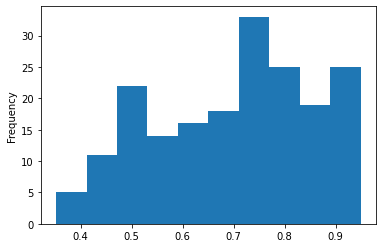

In [18]:
#Histograma del HDI
datosPaises.HDI.plot.hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


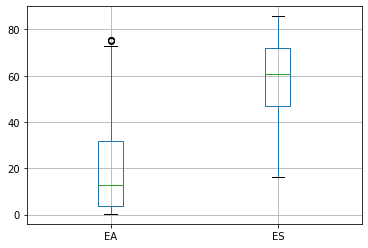

In [19]:
#Grafico de bigote y cajas
datosPaises.boxplot(column=['EA','ES'])